In [1216]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = pd.read_pickle("/home/maksim/Documents/data_Art_10")

In [1217]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price'],
      dtype='object')

In [1218]:
import colorsys
import cv2


#hsv - hue(оттенок), saturation(насыщенность), value(яркость)
def get_hsv(i):
    im = cv2.cvtColor(cv2.imread(X.Paths[i]), cv2.COLOR_BGR2HSV)
    h, s, v = im[:,:,0], im[:,:,1], im[:,:,2]
    return [np.log(np.var(h)),np.log(np.mean(s)), np.log(np.mean(v))]


In [1212]:
hsv = [get_hsv(i) for i in range(X.shape[0])]

<ipython-input-1211-19b7eca9b0f4>:9: RuntimeWarning: divide by zero encountered in log
  return [np.log(np.var(h)),np.log(np.mean(s)), np.log(np.mean(v))]


In [1219]:
df = X.join(pd.DataFrame(hsv, columns=['var_h','mean_s','mean_v']))
X = df[(df['var_h']> -10) & (df['mean_s'] > -10) & (df['mean_v'] > -10)]
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,sex,date_of_birth,hasFollowers,hasAfter,isUntitled,Paths,normalized_price,var_h,mean_s,mean_v
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.515020,6.090201,3.707753,4.995051
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.131443,4.636522,3.940934,4.959478
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,14.328502,3.764300,4.383270,4.486302
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,15.763326,6.834823,2.946216,5.054387
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,M,1901,0,0,0.0,/home/maksim/Art_Images_cropped/alberto\ giaco...,11.199353,3.894546,3.307958,5.493780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,12.618242,7.088267,1.728505,5.086678
9207,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,M,1958,0,0,1.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.211567,7.378052,4.590062,5.083813
9208,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,11.724958,7.321718,4.841382,5.166366
9209,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,M,1958,0,0,0.0,/home/maksim/Art_Images_cropped/zhang\ xiaogan...,13.838281,7.489020,4.465140,5.371690


In [1220]:
pd.to_pickle(X, "/home/maksim/Documents/data_Art_11")

In [1221]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import cv2


X = pd.read_pickle("/home/maksim/Documents/data_Art_11")

In [799]:
from sklearn.preprocessing import MinMaxScaler

def center(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_df = df.select_dtypes(include=numerics)
    str_df = df.select_dtypes(exclude=numerics)
    
    scaler = MinMaxScaler()
    return str_df.join(pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)).dropna()
    
# X = center(X)

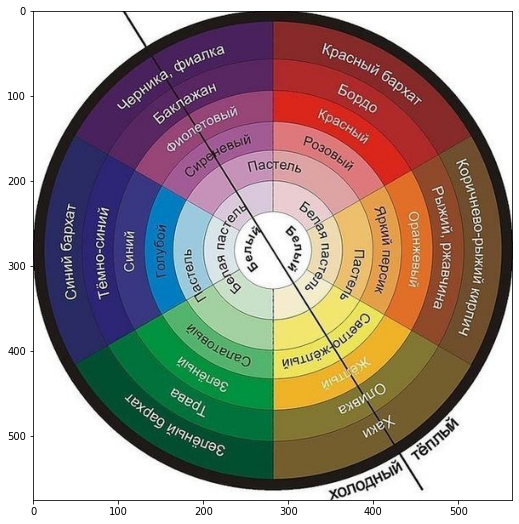

In [1225]:
path = '/home/maksim/Documents/itten_extended.jpg'
image = cv2.imread(path)[:,:,::-1]

plt.figure(figsize = (100,9))
plt.imshow(image)
plt.show()

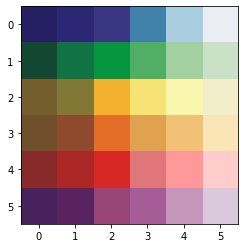

In [1226]:
itten_colors_to_plot = np.array([
    [image[380][80], image[350][100],image[330][127],image[300][150],image[300][200],image[305][230]],
    [image[500][160], image[460][200], image[420][200],image[390][220],image[380][230],image[330][250]],
    [image[520][380], image[480][350], image[450][350],image[380][320], image[410][330], image[350][310]],
    [image[300][540], image[300][500], image[350][430],image[300][400],image[300][370],image[300][350]],
     [image[50][310], image[90][310], image[100][310],image[160][310], [255,153,153], [255,204,204]],
    [image[50][270], image[90][270], image[100][270],image[160][270], image[175][270], image[220][270]]
   
  
])
itten_colors = np.append(itten_colors_to_plot.reshape(1,-1), [[0,0,0], [255,255,255]]).reshape(-1,3)
itten_colors_luv = cv2.cvtColor(np.array([itten_colors], 'float32') / 255, cv2.COLOR_RGB2Luv).reshape(-1,3)


plt.imshow(itten_colors_to_plot)
plt.show()


In [1227]:
from sklearn.metrics.pairwise import euclidean_distances

df = X

def get_image(i):
    return cv2.imread(df.Paths[i])
def get_pixel(i, j, num):
    return np.array([[get_image(num)[i][j]]])


def get_image_colors(image_index):
    luv_img = cv2.cvtColor(np.array(get_image(image_index), 'float32')/255, cv2.COLOR_BGR2LUV)
    closest_colors = np.argmin(euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv),axis=1)   
    v, c = np.unique(closest_colors, return_counts=True)
    c = c / c.sum()
    return v, c, closest_colors, np.shape(luv_img)

def plot_itten(image_index):
    im_data = get_image_colors(image_index)
    im = im_data[2]
    im_shape = (im_data[3][0],im_data[3][1])
    f = lambda x: np.array(itten_colors)[x]
    itten_im = f(im.reshape(im_shape))
    cur_im = get_image(image_index)[:,:,::-1]
    fig, axarr = plt.subplots(1,2)
    axarr[0].set_axis_off()
    axarr[1].set_axis_off()
    axarr[0].imshow(itten_im)
    axarr[1].imshow(cur_im)
    axarr[0].text(0, -100, 'Itten')
    axarr[1].text(0, -100, df['Art'][image_index])
    plt.show()
    

def plot_freq(image_index):
    image = get_image(image_index)    
    colors_info = get_image_colors(image_index)
    colors_indexes, colors_freq = colors_info[0], colors_info[1]
    
    colors = np.array([])
    for j, i in enumerate(colors_indexes):
        itten_pixel = np.array([[itten_colors[int(i)]]], 'float32')
        width = int(10*colors_freq[int(j)]) + 1
        height = 1
        resized = cv2.resize(itten_pixel, (width, height), interpolation = cv2.INTER_AREA)
        if colors_freq[int(j)] > 0.05:
            colors = np.append(colors, resized)
        
    colors = np.reshape(colors, (len(colors) // 3,-1))
    plt.imshow(np.array([colors]).astype(np.uint8))
    plt.show()
    

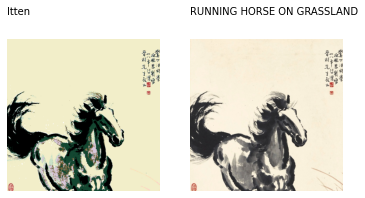

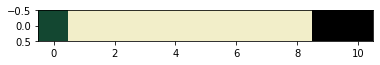

In [1228]:
plot_itten(8290)
plot_freq(8290)

In [1229]:
def get_freq(index):
    l = get_image_colors(index)
    return np.array([l[0], l[1]])

In [1230]:
X.reset_index(drop=True, inplace=True)

In [1231]:
%%time
size = np.shape(X)[0]
colors_freq_1 = [get_freq(x) for x in range(size)]

CPU times: user 31min 26s, sys: 24.2 s, total: 31min 50s
Wall time: 29min 3s


In [1236]:
colors_freq_1[0]

array([[5.00000000e+00, 6.00000000e+00, 1.10000000e+01, 1.20000000e+01,
        1.30000000e+01, 1.70000000e+01, 1.80000000e+01, 1.90000000e+01,
        2.10000000e+01, 2.20000000e+01, 2.30000000e+01, 2.80000000e+01,
        2.90000000e+01, 3.40000000e+01, 3.50000000e+01, 3.60000000e+01,
        3.70000000e+01],
       [5.98310059e-04, 1.22773730e-01, 1.85592491e-01, 2.87020593e-01,
        1.36948492e-01, 4.06661101e-02, 7.91375734e-02, 4.21473386e-03,
        6.56496661e-04, 7.55160899e-04, 7.79194495e-03, 1.26492613e-06,
        8.83803886e-03, 3.60503947e-04, 1.08676128e-01, 1.00713418e-02,
        5.89708561e-03]])

In [1296]:
# [x[0], x[1] for x in colors_freq_1]


In [1319]:
colors_freq_1[5211]

array([[5.00000000e+00, 6.00000000e+00, 1.10000000e+01, 1.20000000e+01,
        1.70000000e+01, 1.80000000e+01, 3.50000000e+01, 3.60000000e+01,
        3.70000000e+01],
       [6.07237944e-02, 8.42432492e-02, 1.95756551e-02, 3.81541422e-03,
        9.57281321e-04, 7.10482230e-05, 5.12457122e-02, 2.00879502e-02,
        7.59279895e-01]])

In [1324]:
l = []

for pair in colors_freq_1:
    colors_indexes = pair[0]
    freq = pair[1]
    for i in range(38):
        if i not in colors_indexes:
            freq = np.insert(freq, i, 0)
    l.append(freq)
data = X.join(pd.DataFrame(l, columns=['Синий брахат', 'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель', 'Синий-белый-пастель', 
'Зеленый бархат', "Трава", "Зеленый", "Салатовый", "Зеленый-пастель", "Зеленый-белый-пастель",
"Хаки", "Оливка", "Желтый", "Светло-желтый", "Желтый-пастель", "Желтый-белый-пастель",
"Коричнего-рыжий кирпич", "Рыжий-ржавчина", "Оранжевый", "Яркий персик", "Оранжевый-пастель", "Оранжевый-белый-пастель",
"Красный бархат", "Бордо", "Красный", "Розовый", "Красный-пастель", "Красный-белый-пастель",
"Черника", "Баклажан", "Фиолетовый", "Сиреневый", "Фиолетовый-пастель", "Фиолетовый-белый-пастель", "черный", "белый"]))

In [1326]:
data

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,Красный-пастель,Красный-белый-пастель,Черника,Баклажан,Фиолетовый,Сиреневый,Фиолетовый-пастель,Фиолетовый-белый-пастель,черный,белый
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,0.000001,0.008838,0.000000,0.000000,0.000000,0.0,0.000361,0.108676,0.010071,0.005897
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,0.000000,0.052893,0.000000,0.000000,0.000000,0.0,0.001365,0.133217,0.001751,0.000046
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000032,0.038419,0.000000
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,0.000000,0.000018,0.000000,0.000000,0.000000,0.0,0.000000,0.531011,0.000433,0.016610
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,0.000000,0.000008,0.000000,0.000000,0.000000,0.0,0.000000,0.006939,0.003401,0.356746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0.000000,0.005823,0.000000,0.000000,0.000000,0.0,0.000342,0.811999,0.001221,0.005811
9206,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0.000000,0.000000,0.000224,0.000245,0.000000,0.0,0.001114,0.277621,0.000026,0.004583
9207,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0.000185,0.000464,0.000177,0.000012,0.000004,0.0,0.000075,0.005466,0.000820,0.000015
9208,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,0.000000,0.000120,0.000000,0.000011,0.000000,0.0,0.000185,0.006895,0.002130,0.054622


In [1327]:
data.reset_index(drop=True, inplace=True)

In [1328]:
pd.to_pickle(data, "/home/maksim/Documents/data_Art_12")

In [1329]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


X = pd.read_pickle("/home/maksim/Documents/data_Art_12")

In [1330]:
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,Красный-пастель,Красный-белый-пастель,Черника,Баклажан,Фиолетовый,Сиреневый,Фиолетовый-пастель,Фиолетовый-белый-пастель,черный,белый
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,0.000001,0.008838,0.000000,0.000000,0.000000,0.0,0.000361,0.108676,0.010071,0.005897
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,0.000000,0.052893,0.000000,0.000000,0.000000,0.0,0.001365,0.133217,0.001751,0.000046
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000032,0.038419,0.000000
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,0.000000,0.000018,0.000000,0.000000,0.000000,0.0,0.000000,0.531011,0.000433,0.016610
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,0.000000,0.000008,0.000000,0.000000,0.000000,0.0,0.000000,0.006939,0.003401,0.356746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0.000000,0.005823,0.000000,0.000000,0.000000,0.0,0.000342,0.811999,0.001221,0.005811
9206,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0.000000,0.000000,0.000224,0.000245,0.000000,0.0,0.001114,0.277621,0.000026,0.004583
9207,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0.000185,0.000464,0.000177,0.000012,0.000004,0.0,0.000075,0.005466,0.000820,0.000015
9208,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,0.000000,0.000120,0.000000,0.000011,0.000000,0.0,0.000185,0.006895,0.002130,0.054622


In [1336]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

In [1343]:
X['sum_blue'] = X.iloc[:, 35:41].sum(axis=1)
X['sum_green'] = X.iloc[:, 41:47].sum(axis=1)
X['sum_yellow'] = X.iloc[:, 47:53].sum(axis=1)
X['sum_orange'] = X.iloc[:, 53:59].sum(axis=1)
X['sum_red'] = X.iloc[:, 59:65].sum(axis=1)
X['sum_purple'] = X.iloc[:, 65:71].sum(axis=1)

In [1344]:
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,Фиолетовый-пастель,Фиолетовый-белый-пастель,черный,белый,sum_blue,sum_green,sum_yellow,sum_orange,sum_red,sum_purple
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,0.000361,0.108676,0.010071,0.005897,0.000598,0.308366,0.464635,0.092556,0.008839,0.109037
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,0.001365,0.133217,0.001751,0.000046,0.000038,0.057391,0.401260,0.351957,0.052975,0.134582
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0.000000,0.000032,0.038419,0.000000,0.000000,0.276561,0.389238,0.295750,0.000000,0.000032
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,0.000000,0.531011,0.000433,0.016610,0.059871,0.287541,0.100613,0.003902,0.000018,0.531011
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,0.000000,0.006939,0.003401,0.356746,0.001838,0.017448,0.612331,0.001289,0.000008,0.006939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0.000342,0.811999,0.001221,0.005811,0.103873,0.069624,0.000273,0.001035,0.005823,0.812340
9206,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0.001114,0.277621,0.000026,0.004583,0.117624,0.011893,0.580137,0.006467,0.000065,0.279205
9207,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0.000075,0.005466,0.000820,0.000015,0.048404,0.126373,0.471310,0.289851,0.057494,0.005734
9208,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,0.000185,0.006895,0.002130,0.054622,0.564965,0.003909,0.255213,0.111949,0.000120,0.007091


In [1345]:
contrst_triad = set()
classic_triad = set()
analog_triad = set()
quad = set()
rectangle = set()
comp = set()


for i in range(12):
    tup = (i, (((i + 6) % 12) + 1) % 12, (((i + 6) % 12) - 1)  % 12) 
    contrst_triad.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (((i + 6) % 12) + 2) % 12, (((i + 6) % 12) - 2)  % 12) 
    classic_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i + 1) % 12, (i - 1) % 12) 
    analog_triad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+3) % 12, (i+6) % 12, (i+9) %12) 
    quad.add(tuple(sorted(tup)))
    
for i in range(12):
    tup = (i, (i+6) % 12, (i+4) % 12, (i-2) %12) 
    rectangle.add(tuple(sorted(tup)))
for i in range(12):
    tup = (i, (i + 6) % 12)
    comp.add(tuple(sorted(tup)))

In [1346]:
colors = X[['салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый']]

comp_colors = np.array([colors.values[i].argsort()[-2:][::-1] for i in range(colors.shape[0])])
triple_colors = np.array([colors.values[i].argsort()[-3:][::-1] for i in range(colors.shape[0])])
quad_colors = np.array([colors.values[i].argsort()[-4:][::-1] for i in range(colors.shape[0])])

In [1347]:
X_contrst_triad = []
X_classic_triad = []
X_analog_triad = []
X_quad = []
X_rectangle = []
X_comp = []



for colors in comp_colors:
    X_comp.append(int(tuple(sorted(colors)) in comp))

for colors in triple_colors:
    X_contrst_triad.append(int(tuple(sorted(colors)) in contrst_triad))
    X_classic_triad.append(int(tuple(sorted(colors)) in classic_triad))
    X_analog_triad.append(int(tuple(sorted(colors)) in analog_triad))
    
for colors in quad_colors:
    X_quad.append(int(tuple(sorted(colors)) in quad))
    X_rectangle.append(int(tuple(sorted(colors)) in rectangle))


In [1348]:
print(np.sum(X_rectangle))
print(np.sum(X_contrst_triad))
print(np.sum(X_classic_triad))
print(np.sum(X_analog_triad))
print(np.sum(X_quad))
print(np.sum(X_rectangle))

28
46
822
845
3
28


In [1349]:
itten_data = pd.DataFrame(X_contrst_triad,columns=['X_contrst_triad']).join(pd.DataFrame(X_classic_triad, columns=['X_classic_triad'])).join(pd.DataFrame(X_rectangle, columns=['X_rectangle'])).join(pd.DataFrame(X_analog_triad, columns=['X_analog_triad'])).join(pd.DataFrame(X_quad, columns=['X_quad'])).join(pd.DataFrame(X_comp, columns=['X_comp']))
X = X.join(itten_data)

In [1350]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

In [1351]:
pd.to_pickle(X, "/home/maksim/Documents/data_Art_13")

In [29]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = pd.read_pickle("/home/maksim/Documents/data_Art_13")

In [30]:
X

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,sum_yellow,sum_orange,sum_red,sum_purple,X_contrst_triad,X_classic_triad,X_rectangle,X_analog_triad,X_quad,X_comp
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,...,0.464635,0.092556,0.008839,0.109037,0,0,0,0,0,0
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,...,0.401260,0.351957,0.052975,0.134582,0,1,0,0,0,0
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,...,0.389238,0.295750,0.000000,0.000032,0,0,0,0,0,0
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,...,0.100613,0.003902,0.000018,0.531011,0,0,0,0,0,0
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,...,0.612331,0.001289,0.000008,0.006939,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,zhang xiaogang,UNTITLED (BLOODLINE SERIES),0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,...,0.000273,0.001035,0.005823,0.812340,0,0,0,0,0,0
9206,zhang xiaogang,UNTITLED (PORTRAIT),0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,...,0.580137,0.006467,0.000065,0.279205,0,0,0,0,0,0
9207,zhang xiaogang,WAITING SPIRITS,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,...,0.471310,0.289851,0.057494,0.005734,0,0,0,0,0,0
9208,zhang xiaogang,YELLOW BABY,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,...,0.255213,0.111949,0.000120,0.007091,0,0,0,0,0,0


In [31]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

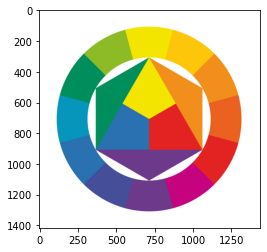

In [15]:
path = "/home/maksim/Documents/itten.jpg"
image = cv2.imread(path)[:,:,::-1]
plt.imshow(image)
plt.show()

itten_colors = [
    image[300][510], image[400][300], image[700][250], image[1000][250], image[1200][500], image[1200][750],
image[1100][1000], image[1000][1100], image[750][1200], image[500][1200], image[300][900], image[300][700]
]

# itten_colors_luv = [cv2.cvtColor(np.array([[x]]), cv2.COLOR_RGB2Luv)[0][0] for x in itten_colors]

itten_colors_luv = cv2.cvtColor(np.array([itten_colors], 'float32') / 255, cv2.COLOR_RGB2Luv).reshape(-1,3)


In [34]:
from sklearn.metrics.pairwise import euclidean_distances

df = X

def get_image(i):
    return cv2.imread(df.Paths[i])
def get_pixel(i, j, num):
    return np.array([[get_image(num)[i][j]]])


def get_image_colors(image_index):
    luv_img = cv2.cvtColor(np.array(get_image(image_index), 'float32')/255, cv2.COLOR_BGR2LUV)
    
    closest_colors = np.argmin(euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv),axis=1)
    print(euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv))
    v, c = np.unique(closest_colors, return_counts=True)
    c = c / c.sum()
    return v, c, closest_colors, np.shape(luv_img)

def plot_itten(image_index):
    im_data = get_image_colors(image_index)
    im = im_data[2]
    im_shape = (im_data[3][0],im_data[3][1])
    f = lambda x: np.array(itten_colors)[x]
    itten_im = f(im.reshape(im_shape))
    cur_im = get_image(image_index)[:,:,::-1]
    fig, axarr = plt.subplots(1,2)
    axarr[0].set_axis_off()
    axarr[1].set_axis_off()
    axarr[0].imshow(itten_im)
    axarr[1].imshow(cur_im)
    axarr[0].text(0, -100, 'Itten')
    axarr[1].text(0, -100, df['Art'][image_index])
    plt.show()
    

def plot_freq(image_index):
    image = get_image(image_index)    
    colors_info = get_image_colors(image_index)
    colors_indexes, colors_freq = colors_info[0], colors_info[1]
    
    colors = np.array([])
    for j, i in enumerate(colors_indexes):
        itten_pixel = np.array([[itten_colors[int(i)]]], 'float32')
        width = int(10*colors_freq[int(j)]) + 1
        height = 1
        resized = cv2.resize(itten_pixel, (width, height), interpolation = cv2.INTER_AREA)
        if colors_freq[int(j)] > 0.05:
            colors = np.append(colors, resized)
        
    colors = np.reshape(colors, (len(colors) // 3,-1))
    plt.imshow(np.array([colors]).astype(np.uint8))
    plt.show()
    
def plot_itten_info(i):
    plot_itten(i)
    plot_freq(i)

In [44]:
luv_img = cv2.cvtColor(np.array(get_image(0), 'float32')/255, cv2.COLOR_BGR2LUV)
distances = euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv)
closest_colors = np.argmin(distances,axis=1)
np.shape(distances)

(790560, 12)

In [45]:
np.shape(closest_colors)

(790560,)

In [50]:

l = []
for i in range(len(distances)):
    l.append(distances[i][closest_colors[i]])
np.shape(l)

(790560,)

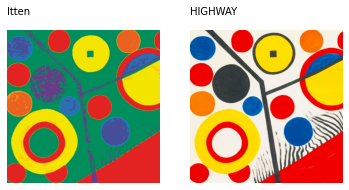

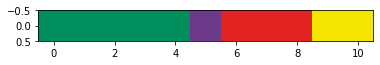

In [17]:
plot_itten_info(120)

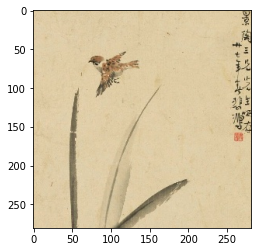

In [19]:
def plot_image(i):
    plt.imshow(cv2.imread(X.Paths[i])[:,:,::-1])
    plt.show()
plot_image(8293)

In [20]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

In [21]:
X.date_of_birth

0       1901
1       1901
2       1901
3       1901
4       1901
        ... 
9205    1958
9206    1958
9207    1958
9208    1958
9209    1521
Name: date_of_birth, Length: 9210, dtype: int64

In [22]:
X['date_of_birth'] = np.log(X['date_of_birth'])

In [23]:
X['date_of_birth'] = X['date_of_birth'] - np.average(X['date_of_birth'])

In [24]:
X.var_h = X.var_h  - np.average(X.var_h)
X.mean_s = X.mean_s  - np.average(X.mean_s)
X.mean_v = X.mean_v  - np.average(X.mean_v)

X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

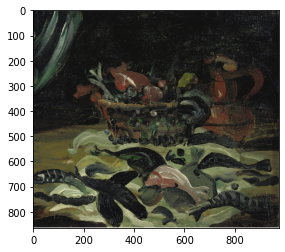

-1.02


In [25]:
plot_image(409)
print(np.round(X.mean_v[409], 2))

In [26]:
X[X['mean_v'] < -1]

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,sum_yellow,sum_orange,sum_red,sum_purple,X_contrst_triad,X_classic_triad,X_rectangle,X_analog_triad,X_quad,X_comp
38,alexander calder,ALEXANDER CALDER,0.000000,0.252853,0.000437,0.000000,0.000000,0.695637,0.020174,0.000000,...,0.023579,0.131761,0.007652,0.006117,0,1,0,0,0,0
309,alexej jawlensky,MEDITATION,0.000000,0.047253,0.004511,0.000067,0.000829,0.936403,0.006810,0.000000,...,0.001507,0.070426,0.002439,0.014035,0,0,0,0,0,0
408,andré derain,NATURE MORTE AUX FRUITS,0.044314,0.422491,0.000002,0.000000,0.000000,0.499706,0.000227,0.000000,...,0.235483,0.049950,0.000256,0.000113,0,0,0,0,0,0
409,andré derain,NATURE MORTE AUX POISSONS,0.005665,0.392125,0.003639,0.000000,0.000000,0.597290,0.000374,0.000000,...,0.166897,0.055014,0.000128,0.000528,0,0,0,0,0,0
455,andré derain,VASE DE FLEURS,0.004893,0.151138,0.004460,0.000000,0.000343,0.706982,0.022294,0.000000,...,0.041376,0.115685,0.052834,0.004724,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,wassily kandinsky,ÉTUDE POUR 'CONTRASTES RÉDUITS',0.001922,0.703737,0.004665,0.000000,0.000418,0.283716,0.001957,0.000000,...,0.043681,0.044849,0.001818,0.008786,0,0,0,0,0,0
8388,zao wou-ki,1.9.60,0.000095,0.224789,0.007276,0.000000,0.000000,0.756732,0.010407,0.000000,...,0.070623,0.098697,0.005336,0.004428,0,0,0,0,0,0
8501,zao wou-ki,NUIT-MINUIT,0.000015,0.123717,0.009919,0.000006,0.004405,0.843548,0.008842,0.002135,...,0.007486,0.022421,0.015174,0.010899,0,0,0,0,0,0
8537,zao wou-ki,UNTITLED 1958-1,0.000623,0.123676,0.001628,0.000000,0.000007,0.873195,0.000000,0.000000,...,0.021849,0.031632,0.000051,0.001189,0,0,0,0,0,0


In [27]:
X.describe()

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,...,sum_yellow,sum_orange,sum_red,sum_purple,X_contrst_triad,X_classic_triad,X_rectangle,X_analog_triad,X_quad,X_comp
count,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,...,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000
mean,0.081026,0.532463,0.068915,0.006707,0.017611,0.134436,0.013294,0.008672,0.011627,0.042357,...,0.255406,0.163689,0.048188,0.046949,0.004995,0.089251,0.003040,0.091748,0.000326,0.012161
std,0.160130,0.306250,0.135599,0.037672,0.072380,0.177898,0.049964,0.044560,0.043598,0.092926,...,0.254316,0.218150,0.106092,0.093902,0.070499,0.285121,0.055057,0.288686,0.018046,0.109609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000780,0.271381,0.000124,0.000000,0.000000,0.011150,0.000000,0.000000,0.000000,0.000049,...,0.048339,0.012694,0.000151,0.000775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015366,0.539659,0.005979,0.000000,0.000000,0.062384,0.000073,0.000000,0.000004,0.004999,...,0.171715,0.070222,0.005583,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.076957,0.806528,0.069290,0.000074,0.003278,0.188184,0.004174,0.000013,0.002986,0.038490,...,0.387565,0.222515,0.043475,0.049479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.981681,1.000000,0.992113,0.914321,1.000000,1.000000,0.992884,0.976787,0.989081,0.991626,...,0.999830,0.999983,0.996850,0.946147,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

data = sm.add_constant(
    pd.get_dummies(X.drop(['normalized_price', 'Paths', 'Art', 
                                              
                                              'Author',
#                                               'желтый', 
#                                        'зеленый', 'бирюзовый', 'синий',
#        'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
#        'оранжевый', 'ярко-желтый', 'салатовый',
#                                               'X_contrst_triad',
#        'X_classic_triad', 'X_rectangle', 'X_analog_triad', 'X_quad', 'X_comp',
                                              
                                              
#                                               'lines_variance',
                                              
                                              
                                              'var_h',
                                              'mean_s', 
                                              'mean_v',
                                              
                             
                                              'Синий брахат', 
                                              'Темно-синий', 
                                              'Синий', 'Голубой', 
                                              'Синий-пастель', 'Синий-белый-пастель', 
'Зеленый бархат', "Трава", "Зеленый", "Салатовый", 
                                              "Зеленый-пастель",
                                              "Зеленый-белый-пастель",
"Хаки", "Оливка", "Желтый", "Светло-желтый", 
                                              "Желтый-пастель", 
                                              "Желтый-белый-пастель",
"Коричнего-рыжий кирпич", 
                                              "Рыжий-ржавчина", 
                                              "Оранжевый", "Яркий персик", "Оранжевый-пастель", "Оранжевый-белый-пастель",
"Красный бархат", 
                                              "Бордо", "Красный", 
                                              "Розовый", "Красный-пастель", 
                                              "Красный-белый-пастель",
"Черника", 
                                              "Баклажан", "Фиолетовый",
                                              "Сиреневый", 
                                              "Фиолетовый-пастель", "Фиолетовый-белый-пастель",
                                              
                                              "черный",
                                              "белый", 
                                              'sum_blue','sum_green','sum_yellow', 'sum_orange','sum_red',
                                              'sum_purple',
                                              
#                                               'hasFollowers',
#                                               'style', 
#                                               'Material',
#                            'Technique', 
#                                               'date_of_birth', 
#                                               'hasAfter',
                                              
                                              
#                                               'Nazi', 'Sign', 'Framed', 'square_m',
#        'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum',
#         'isUntitled', 'sex'
                                              
                                              
                      ],axis=1))
    .drop([
        'Technique_drypoint', 'Technique_etched', 'Technique_pencil',
           'style_academicism',
           'Material_gold','Material_volant',
           'sex_M', 
    ], axis=1))


X_train, X_test, y_train, y_test = train_test_split(data , X['normalized_price'], test_size=0.333, random_state=39)


model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
print("Size of train is ", y_train.shape[0])
print("MSE of train is ", ((model.predict(X_train)  - y_train) ** 2).mean())
print("MSE of test is ", ((predictions - y_test) ** 2).mean())

model.summary()

Size of train is  6143
MSE of train is  1.4822759914127108
MSE of test is  1.5252182940667307


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:27:44   Log-Likelihood:                -9925.4
No. Observations:                6143   AIC:                         2.005e+04
Df Residuals:                    6042   BIC:                         2.073e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  8.5534      0.621     13.775      0.000       7.336       9.771
салатовый                              0.3037      0.124      2.443      0.015       0.060       0.547
зеленый                                0.4518      0.089      5.081      0.000       0.277       0.626
бирюзовый                              0.9491      0.141      6.729      0.000       0.673       1.226
синий                                  0.8552      0.422      2.028      0.043       0.029       1.682
темно-синий                            0.9148      0.272      3.367      0.001       0.382       1.447
фиолетовый                             0.8224      0.122      6.733      0.000       0.583       1.062
розовый                                0.6687      0.303      2.210      0.027       0.076       1.262
красный                                0.8038      0.392      2.049      0.041       0.035       1.573
ярко-оранжевый                         1.0661      0.404      2.640      0.008       0.274       1.858
оранжевый                              0.6007      0.204      2.942      0.003       0.200       1.001
ярко-желтый                            0.2052      0.130      1.574      0.116      -0.050       0.461
желтый                                 0.9118      0.361      2.529      0.011       0.205       1.619
lines_variance                         2.9223      0.360      8.123      0.000       2.217       3.628
Nazi                                   0.0716      0.179      0.399      0.690      -0.280       0.423
Sign                                   0.2107      0.051      4.103      0.000       0.110       0.311
Framed                                 0.0307      0.062      0.497      0.619      -0.090       0.152
square_m                               0.3965      0.020     20.332      0.000       0.358       0.435
ExhibitedNum                           0.1025      0.007     13.924      0.000       0.088       0.117
ProvenanceNum                          0.1184      0.008     14.409      0.000       0.102       0.134
LiteratureNum                          0.2065      0.010     19.789      0.000       0.186       0.227
date_of_birth                          3.4348      1.049      3.275      0.001       1.379       5.491
hasFollowers                           0.0479      0.251      0.191      0.849      -0.445       0.541
hasAfter                               0.5794      0.045     12.959      0.000       0.492       0.667
isUntitled                            -0.2387      0.080     -2.977      0.003      -0.396      -0.081
X_contrst_triad                        0.2923      0.230      1.271      0.204      -0.159       0.743
X_classic_triad                       -0.1831      0.061     -3.010      0.003      -0.302      

In [1460]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

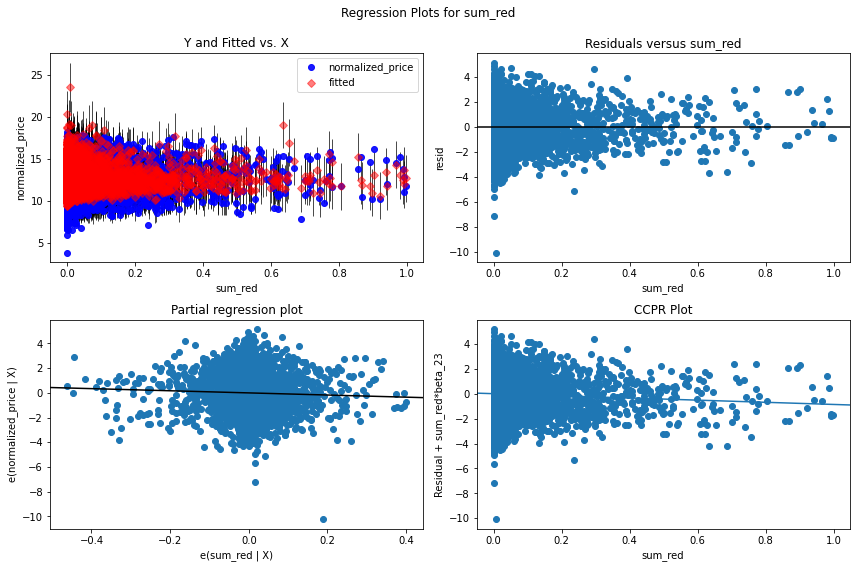

In [555]:
sm.graphics.plot_regress_exog(model, 'sum_red', fig= plt.figure(figsize=(12,8)))
plt.show()

In [1479]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)

scores = cross_val_score(lin_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
lin_mse_scores = -scores

In [1480]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_mse_scores)

Scores: [1.3999791  1.78239455 1.76622743 1.50425751 1.47031932 1.61832138
 1.56503567 1.53566538 1.50182583 1.56502046]
Mean: 1.5709046627351817
Standard deviation: 0.11618298705117448


In [1483]:
from sklearn.metrics import r2_score
lin_reg.score(X_train,y_train)

0.6229178208042196

In [1552]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

scores = cross_val_score(forest_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores

display_scores(tree_mse_scores)
feature_importances = forest_reg.feature_importances_
sorted(zip(np.round(feature_importances,3), X_train.columns), reverse=True)

Scores: [1.15832722 1.34339587 1.30350045 1.16186698 1.03903987 1.037668
 1.17759261 1.09253945 1.17162875 1.24973524]
Mean: 1.1735294446738525
Standard deviation: 0.09749194344057482


[(0.258, 'Material_canvas'),
 (0.208, 'square_m'),
 (0.12, 'LiteratureNum'),
 (0.089, 'ExhibitedNum'),
 (0.06, 'date_of_birth'),
 (0.051, 'ProvenanceNum'),
 (0.028, 'Technique_lithograph'),
 (0.023, 'hasAfter'),
 (0.013, 'style_fauvism'),
 (0.013, 'Technique_print'),
 (0.011, 'Technique_oil'),
 (0.009, 'style_abstractionism'),
 (0.008, 'Sign'),
 (0.008, 'Material_paper'),
 (0.007, 'style_expressionism'),
 (0.007, 'style_cubism'),
 (0.006, 'Technique_gouache'),
 (0.005, 'isUntitled'),
 (0.005, 'Technique_ink'),
 (0.005, 'Framed'),
 (0.004, 'style_realism'),
 (0.004, 'hasFollowers'),
 (0.003, 'style_surrealism'),
 (0.003, 'style_modernism'),
 (0.003, 'style_impressionism'),
 (0.003, 'style_abstract expressionism'),
 (0.002, 'style_traditional chinese painting'),
 (0.002, 'style_post-impressionism'),
 (0.002, 'style_pop-art'),
 (0.002, 'style_organic abstraction'),
 (0.002, 'style_nabism'),
 (0.002, 'style_dadaism'),
 (0.002, 'Technique_pastel'),
 (0.002, 'Technique_charcoal'),
 (0.002, '

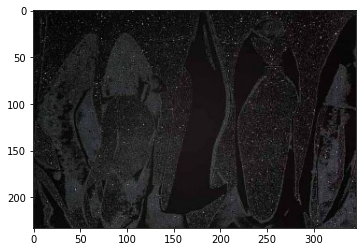

0.16931252446283196


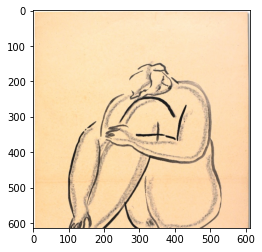

0.991681392675295


In [408]:
path = X[X.mean_s < 0.01].Paths.values[0]
im = cv2.imread(X.Paths[756])
plt.imshow(im[:,:,::-1])
plt.show()
print(X.mean_v[756])

im = cv2.imread(X.Paths[7520])
plt.imshow(im[:,:,::-1])
plt.show()
print(X.mean_v[7520])